In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
np.random.seed = 69

In [2]:
def squish(z):
    a = 1/(1+np.exp(-z))
    return a

def squishprime(z):
    fprime = np.multiply(squish(z),(1-squish(z)))
    return fprime

In [3]:
class NeuralNetwork():
    #lis contains sizes of each layer
    def __init__(self, lis): 
        
        self.n = len(lis) # number of layers in total
        self.reset()
        self.WML = [[[0]] ] #dummy weight matrix associated with first layer
        self.BL = [[[0]] ] #dummy bias matrix/list associated with first layer
        self.Jprogress = []
        np.random.seed = 34
        
        #initialize random weight matrices here...
        for i in range(len(lis)-1):
            #random weight matrix per layer
            shape = (lis[i], lis[i+1])
            wm = np.random.randn(lis[i], lis[i+1])
            self.WML.append(wm)
            #random biases per layer
            b = np.random.randn(1, lis[i+1])
            self.BL.append(b)
            
    def reset(self):
        
        self.AL = [] #list of layer activations
        self.FprimeL = [[] ] #AL0 does not have z value to find fprime
        self.DL = [[[]] ] #AL0 does not have delta values       
        self.err =[[]]
        self.C =[]
        self.J = 0
    
    def forward(self, X):
        
        self.reset()
        self.AL.append(X)
        for i in range(self.n-1):
            wm = self.WML[i+1]
            b = self.BL[i+1]
            z = np.matmul(self.AL[i], wm) + b
            a = squish(z)
            f = squishprime(z)
            self.AL.append(a)
            self.FprimeL.append(f)
        return self.AL[-1]
        
    def backward(self, Y):
        
        for i in range(1, self.n):
            #i = 1 represents the last layer L
            #then you count backwards
            if(i == 1):
                E = self.AL[-1] - Y
            else:
                wm = self.WML[-i + 1]  #weights of l+1 layer
                E = np.matmul(self.DL[1], wm.T) #propogated errors
            f = self.FprimeL[-i]
            d = np.multiply(f, E)
            self.DL.insert(1, d)
            
    def updateWeights(self, alpha=0.2):
        
        for i in range(1, self.n):
            al1 = self.AL[i-1]
            dl2 = self.DL[i]
            changeInWeights = np.matmul(al1.T, dl2)
            changeInBiases = np.matmul(np.ones(len(dl2)).reshape(1,len(dl2)), dl2)
            
            self.WML[i] = self.WML[i] - alpha*changeInWeights
            self.BL[i] = self.BL[i] - alpha*changeInBiases         
        
    def batchTrain(self, X, Y, alpha):
        self.forward(X)
        self.backward(Y)
        self.updateWeights(alpha)
        
    def plotProgress(self):
        plt.plot(self.Jprogress, 'ro', ms=2)
        plt.xlabel('batch')
        plt.ylabel('Cost')
        plt.title('Cost progress with each batch') 

    def train(self, X, Y, batchSize=10, epochs=1, alpha=0.2):
        
        for i in range(0, len(X), batchSize):
            if(i+batchSize<len(X)):
                Xbatch = X[i:i+batchSize]
                Ybatch = Y[i:i+batchSize]
            else:
                Xbatch = X[i:]
                Ybatch = Y[i:]
                
            for epoch in range(epochs):
                self.batchTrain(Xbatch, Ybatch, alpha)
                
        self.Jprogress.append(self.cost(X, Y))
        #self.plotProgress()

    def cost(self, X, Y):
            err = self.forward(X) - Y
            err2 = err**2
            C = [sum(i) for i in err2/2] # C[t] gives cost of a sample
            J = sum(C) #total cost after running a batch
            return J

    def classify(self, X):
        return (self.forward(X)>0.5).astype('int32')

In [4]:
#making data
N = 1000
shape = (N,1)
height = np.random.randint(160,201,shape)
fit = np.random.randint(1,11,shape)
funny = np.random.randint(1,11,shape)

y = (height+2*fit+4*funny-210>=0).astype('int32')
data = np.hstack((height,fit,funny,y))
data

X_train = data[:,1:len(data)]
y_train = data[:,-1:]
data

array([[187,   2,   8,   1],
       [171,   7,   4,   0],
       [160,   3,   6,   0],
       ...,
       [168,   4,   2,   0],
       [179,   1,   2,   0],
       [176,   6,  10,   1]])

In [5]:
net = NeuralNetwork([X_train.shape[1],y_train.shape[1]])

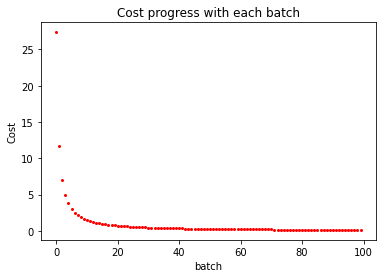

In [6]:
for i in range(100):
    net.train(X_train, y_train, 10, 10, 0.01)
net.plotProgress()

In [7]:
data[:10]

array([[187,   2,   8,   1],
       [171,   7,   4,   0],
       [160,   3,   6,   0],
       [188,   2,   6,   1],
       [170,   3,   5,   0],
       [194,   8,   3,   1],
       [190,   9,   1,   1],
       [179,   4,   7,   1],
       [165,  10,   4,   0],
       [193,   4,   5,   1]])

In [8]:
net.classify(X_train)[:10]

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1]])

In [9]:
net.WML[1]

array([[-0.02201227],
       [ 0.04017434],
       [ 8.12489647]])

In [10]:
net.BL

[[[0]], array([[-3.97574295]])]